In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
train_dir = ('training/training/')
test_dir = ('validation/validation/')

In [3]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [4]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [5]:
height=150
width=150
seed=1337
batch_size = 128
num_classes = 10
data_augmentation = True
epochs=20
batch_size=128

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [6]:
base_model=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling='avg',
    classifier_activation="softmax"
)

In [7]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 256)               131328    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps= validation_num // batch_size,
                              verbose = 1
                             )

Epoch 1/20
8/8 [==============================] - 262s 32s/step - loss: 2.3110 - accuracy: 0.1371 - val_loss: 2.0771 - val_accuracy: 0.2422
Epoch 2/20
8/8 [==============================] - 253s 31s/step - loss: 1.9469 - accuracy: 0.3027 - val_loss: 1.6594 - val_accuracy: 0.3984
Epoch 3/20
8/8 [==============================] - 241s 30s/step - loss: 1.6011 - accuracy: 0.4340 - val_loss: 1.5182 - val_accuracy: 0.4805
Epoch 4/20
8/8 [==============================] - 258s 32s/step - loss: 1.2610 - accuracy: 0.5722 - val_loss: 1.3597 - val_accuracy: 0.5508
Epoch 5/20
8/8 [==============================] - 258s 31s/step - loss: 1.0469 - accuracy: 0.6309 - val_loss: 1.0029 - val_accuracy: 0.6953
Epoch 6/20
8/8 [==============================] - 244s 30s/step - loss: 0.7905 - accuracy: 0.7351 - val_loss: 0.8809 - val_accuracy: 0.7305
Epoch 7/20
8/8 [==============================] - 260s 32s/step - loss: 0.5723 - accuracy: 0.7900 - val_loss: 0.7363 - val_accuracy: 0.7617
Epoch 8/20
8/8 [====

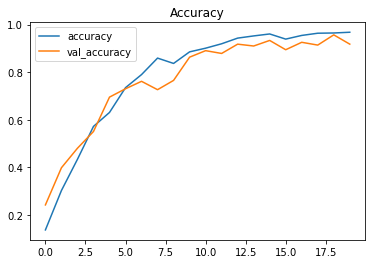

In [12]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

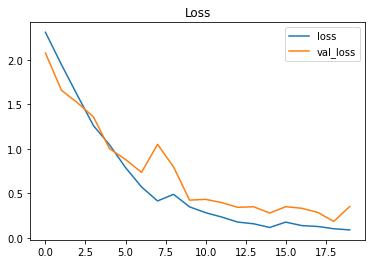

In [13]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [14]:
pred = model.predict(validation_generator)
pred = np.argmax(pred,axis=1)

pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: [' mantled_howler                ', ' mantled_howler                ', ' mantled_howler                ', ' mantled_howler                ', ' mantled_howler                ']


In [15]:
print(pred[50])
print(validation_generator)

 patas_monkey                  
